In [1]:

# Created by: Uchenna Ilodigwe
# Date Created: 07/10/2022
# Last Modified: 07/11/2022
# Description: Accenture Data Analyst (Forage) - Data Cleaning

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Create dataframe for Profile csv file
profile = pd.read_csv('Accenture/Profile.csv', index_col = 0)
profile.head()

User ID  \
0  4c731e48-0377-4d7d-b4c8-b2174b774ed8   
1  95258c36-5b6b-4591-85ee-0c43f503c1d5   
2  a8229d24-f219-4930-a382-24049a8f73bb   
3  8f41c07f-db4f-44f3-ae81-1f99cee047eb   
4  3af8d78b-55c4-4ac0-8161-7cc3f6ec11c9   

                                     Interests  Age  
0                                       [0, 1]   41  
1                                   ['tennis']   23  
2  ['fitness', 'cooking', 'animals', 'travel']   25  
3        ['technology', 'culture', 'veganism']    2  
4                                ['education']   44

In [4]:
#Create user dataframe from user.csv file
user = pd.read_csv('Accenture/User.csv', index_col = 0)
user.head()

User ID             Name         Email
0  4c731e48-0377-4d7d-b4c8-b2174b774ed8        Gary Hill  GHbnuothhymw
1  95258c36-5b6b-4591-85ee-0c43f503c1d5  Michael Deering  MD@gmail.com
2  a8229d24-f219-4930-a382-24049a8f73bb     Richard Bain  RB@gmail.com
3  8f41c07f-db4f-44f3-ae81-1f99cee047eb  Kristi Mccarthy  KM@gmail.com
4  3af8d78b-55c4-4ac0-8161-7cc3f6ec11c9      Betty Ellis  BE@gmail.com

In [5]:
# checking shape of dataset
print(user.shape)
print(profile.shape)

(500, 3)
(500, 3)


In [6]:
#merge user and profile dataframe on the user_id column
user_profile = user.merge(profile, on = 'User ID')
user_profile.head()

User ID             Name         Email  \
0  4c731e48-0377-4d7d-b4c8-b2174b774ed8        Gary Hill  GHbnuothhymw   
1  95258c36-5b6b-4591-85ee-0c43f503c1d5  Michael Deering  MD@gmail.com   
2  a8229d24-f219-4930-a382-24049a8f73bb     Richard Bain  RB@gmail.com   
3  8f41c07f-db4f-44f3-ae81-1f99cee047eb  Kristi Mccarthy  KM@gmail.com   
4  3af8d78b-55c4-4ac0-8161-7cc3f6ec11c9      Betty Ellis  BE@gmail.com   

                                     Interests  Age  
0                                       [0, 1]   41  
1                                   ['tennis']   23  
2  ['fitness', 'cooking', 'animals', 'travel']   25  
3        ['technology', 'culture', 'veganism']    2  
4                                ['education']   44

In [7]:
#Drop the Name ,Email columns which are not required in the analysis

user_profile.drop(['Name','Email'], axis = 1, inplace = True)
user_profile.head()

User ID  \
0  4c731e48-0377-4d7d-b4c8-b2174b774ed8   
1  95258c36-5b6b-4591-85ee-0c43f503c1d5   
2  a8229d24-f219-4930-a382-24049a8f73bb   
3  8f41c07f-db4f-44f3-ae81-1f99cee047eb   
4  3af8d78b-55c4-4ac0-8161-7cc3f6ec11c9   

                                     Interests  Age  
0                                       [0, 1]   41  
1                                   ['tennis']   23  
2  ['fitness', 'cooking', 'animals', 'travel']   25  
3        ['technology', 'culture', 'veganism']    2  
4                                ['education']   44

In [8]:
# checking shape of the new dataset
print(user_profile.shape)


(500, 3)


In [9]:
#Read the Reactions.csv file and create a pandas dataframe
reactions = pd.read_csv('Accenture/Reactions.csv',index_col = 0)
reactions.head()

Content ID                               User ID  \
0  97522e57-d9ab-4bd6-97bf-c24d952602d2                                   NaN   
1  97522e57-d9ab-4bd6-97bf-c24d952602d2  5d454588-283d-459d-915d-c48a2cb4c27f   
2  97522e57-d9ab-4bd6-97bf-c24d952602d2  92b87fa5-f271-43e0-af66-84fac21052e6   
3  97522e57-d9ab-4bd6-97bf-c24d952602d2  163daa38-8b77-48c9-9af6-37a6c1447ac2   
4  97522e57-d9ab-4bd6-97bf-c24d952602d2  34e8add9-0206-47fd-a501-037b994650a2   

      Type             Datetime  
0      NaN  2021-04-22 15:17:15  
1  disgust  2020-11-07 09:43:50  
2  dislike  2021-06-17 12:22:51  
3   scared  2021-04-18 05:13:58  
4  disgust  2021-01-06 19:13:01

In [10]:
#Read the ReactionTypes.csv file and convert to a pandas dataframe
reactionTypes = pd.read_csv('Accenture/ReactionTypes.csv', index_col = 0)
reactionTypes.head()


Type Sentiment  Score
0       heart  positive     60
1        want  positive     70
2     disgust  negative      0
3        hate  negative      5
4  interested  positive     30

In [11]:
# checking shape of dataset
print(reactions.shape)
print(reactionTypes.shape)

(25553, 4)
(16, 3)


In [12]:
#check the datatypes of the reactions dataframe
reactions.dtypes

Content ID    object
User ID       object
Type          object
Datetime      object
dtype: object

In [13]:
#check the datatypes of the reactionTypes dataframe
reactionTypes.dtypes

Type         object
Sentiment    object
Score         int64
dtype: object

In [14]:
#Merge the reactions and reactionTypes dataframe on the Type column
#N.B: inner join is used because the score values are needed to aggregate the popularity of the categories.
react_ReactionTypes = reactions.merge(reactionTypes,how = 'left', on = 'Type')
react_ReactionTypes.head()

Content ID                               User ID  \
0  97522e57-d9ab-4bd6-97bf-c24d952602d2                                   NaN   
1  97522e57-d9ab-4bd6-97bf-c24d952602d2  5d454588-283d-459d-915d-c48a2cb4c27f   
2  97522e57-d9ab-4bd6-97bf-c24d952602d2  92b87fa5-f271-43e0-af66-84fac21052e6   
3  97522e57-d9ab-4bd6-97bf-c24d952602d2  163daa38-8b77-48c9-9af6-37a6c1447ac2   
4  97522e57-d9ab-4bd6-97bf-c24d952602d2  34e8add9-0206-47fd-a501-037b994650a2   

      Type             Datetime Sentiment  Score  
0      NaN  2021-04-22 15:17:15       NaN    NaN  
1  disgust  2020-11-07 09:43:50  negative    0.0  
2  dislike  2021-06-17 12:22:51  negative   10.0  
3   scared  2021-04-18 05:13:58  negative   15.0  
4  disgust  2021-01-06 19:13:01  negative    0.0

In [15]:
#Check for null values
react_ReactionTypes.isnull().sum()

Content ID       0
User ID       3019
Type           980
Datetime         0
Sentiment      980
Score          980
dtype: int64

In [16]:
#Check the shape of the new dataframe

print(react_ReactionTypes.shape)

(25553, 6)


In [17]:
#Read the content.csv file and create pandas dataframe
content = pd.read_csv('Accenture/Content.csv', index_col = 0)
content.head()

Content ID                               User ID  \
0  97522e57-d9ab-4bd6-97bf-c24d952602d2  8d3cd87d-8a31-4935-9a4f-b319bfe05f31   
1  9f737e0a-3cdd-4d29-9d24-753f4e3be810  beb1f34e-7870-46d6-9fc7-2e12eb83ce43   
2  230c4e4d-70c3-461d-b42c-ec09396efb3f  a5c65404-5894-4b87-82f2-d787cbee86b4   
3  356fff80-da4d-4785-9f43-bc1261031dc6  9fb4ce88-fac1-406c-8544-1a899cee7aaf   
4  01ab84dd-6364-4236-abbb-3f237db77180  e206e31b-5f85-4964-b6ea-d7ee5324def1   

    Type        Category                                                URL  
0  photo        Studying  https://socialbuzz.cdn.com/content/storage/975...  
1  photo  healthy eating  https://socialbuzz.cdn.com/content/storage/9f7...  
2  photo  healthy eating  https://socialbuzz.cdn.com/content/storage/230...  
3  photo      technology  https://socialbuzz.cdn.com/content/storage/356...  
4  video            food  https://socialbuzz.cdn.com/content/storage/01a...

In [18]:
# checking shape of dataset
print(content.shape)


(1000, 5)


In [19]:
#Merge the user_profile and content dataframe
user_content = user_profile.merge(content, on = 'User ID')
user_content.head()

User ID   Interests  Age  \
0  4c731e48-0377-4d7d-b4c8-b2174b774ed8      [0, 1]   41   
1  4c731e48-0377-4d7d-b4c8-b2174b774ed8      [0, 1]   41   
2  4c731e48-0377-4d7d-b4c8-b2174b774ed8      [0, 1]   41   
3  95258c36-5b6b-4591-85ee-0c43f503c1d5  ['tennis']   23   
4  95258c36-5b6b-4591-85ee-0c43f503c1d5  ['tennis']   23   

                             Content ID   Type Category  \
0  636e6499-b670-4cd4-a829-2c4c9e07db2a  photo   soccer   
1  4b582733-141e-488f-8d02-3c4b149815a5  photo  fitness   
2  674507f9-c555-4876-89c7-c06b6db561c0  audio  animals   
3  8fa19e64-72ab-4cff-bc92-b8a057395043  photo     food   
4  c13e7406-c610-4721-b80d-2b5ad533e90a    GIF  cooking   

                                                 URL  
0  https://socialbuzz.cdn.com/content/storage/636...  
1  https://socialbuzz.cdn.com/content/storage/4b5...  
2  https://socialbuzz.cdn.com/content/storage/674...  
3  https://socialbuzz.cdn.com/content/storage/8fa...  
4  https://socialbuzz.cdn.com/content/storage/c13...

In [20]:
# checking shape of dataset
print(user_content.shape)


(1000, 7)


In [21]:
#Check for duplicates in the user_content table
column_names = ['User ID', 'Content ID']
duplicates = user_content.duplicated(subset = column_names, keep = False)
print(user_content[duplicates])

Empty DataFrame
Columns: [User ID, Interests, Age, Content ID, Type, Category, URL]
Index: []


In [22]:
# merge User_content table and react_ReactionTypes table
final_df = user_content.merge(react_ReactionTypes,how = 'left', on  = 'Content ID')
final_df.head()

User ID_x Interests  Age  \
0  4c731e48-0377-4d7d-b4c8-b2174b774ed8    [0, 1]   41   
1  4c731e48-0377-4d7d-b4c8-b2174b774ed8    [0, 1]   41   
2  4c731e48-0377-4d7d-b4c8-b2174b774ed8    [0, 1]   41   
3  4c731e48-0377-4d7d-b4c8-b2174b774ed8    [0, 1]   41   
4  4c731e48-0377-4d7d-b4c8-b2174b774ed8    [0, 1]   41   

                             Content ID Type_x Category  \
0  636e6499-b670-4cd4-a829-2c4c9e07db2a  photo   soccer   
1  636e6499-b670-4cd4-a829-2c4c9e07db2a  photo   soccer   
2  636e6499-b670-4cd4-a829-2c4c9e07db2a  photo   soccer   
3  636e6499-b670-4cd4-a829-2c4c9e07db2a  photo   soccer   
4  636e6499-b670-4cd4-a829-2c4c9e07db2a  photo   soccer   

                                                 URL  \
0  https://socialbuzz.cdn.com/content/storage/636...   
1  https://socialbuzz.cdn.com/content/storage/636...   
2  https://socialbuzz.cdn.com/content/storage/636...   
3  https://socialbuzz.cdn.com/content/storage/636...   
4  https://socialbuzz.cdn.com/content/storage/636...   

                              User ID_y       Type_y             Datetime  \
0                                   NaN          NaN  2020-10-19 18:06:49   
1  9fbae7e6-65a9-4753-8db9-5f7855b6a540  indifferent  2020-12-31 20:12:39   
2  289044c8-e74c-4814-898a-b3b5eba6e46e        heart  2020-09-09 12:14:26   
3  d1a89d23-7d17-4949-9e1a-637317141f3d   super love  2021-04-10 01:32:31   
4  4fe420fa-a193-4408-bd5d-62a020233609      disgust  2020-10-25 11:46:47   

  Sentiment  Score  
0       NaN    NaN  
1   neutral   20.0  
2  positive   60.0  
3  positive   75.0  
4  negative    0.0

In [23]:
#Drop columns that won't be used in the analysis
final_df.drop(columns = ['User ID_x','Interests','URL','Age'], inplace =True)
final_df.head()

Content ID Type_x Category  \
0  636e6499-b670-4cd4-a829-2c4c9e07db2a  photo   soccer   
1  636e6499-b670-4cd4-a829-2c4c9e07db2a  photo   soccer   
2  636e6499-b670-4cd4-a829-2c4c9e07db2a  photo   soccer   
3  636e6499-b670-4cd4-a829-2c4c9e07db2a  photo   soccer   
4  636e6499-b670-4cd4-a829-2c4c9e07db2a  photo   soccer   

                              User ID_y       Type_y             Datetime  \
0                                   NaN          NaN  2020-10-19 18:06:49   
1  9fbae7e6-65a9-4753-8db9-5f7855b6a540  indifferent  2020-12-31 20:12:39   
2  289044c8-e74c-4814-898a-b3b5eba6e46e        heart  2020-09-09 12:14:26   
3  d1a89d23-7d17-4949-9e1a-637317141f3d   super love  2021-04-10 01:32:31   
4  4fe420fa-a193-4408-bd5d-62a020233609      disgust  2020-10-25 11:46:47   

  Sentiment  Score  
0       NaN    NaN  
1   neutral   20.0  
2  positive   60.0  
3  positive   75.0  
4  negative    0.0

In [24]:
#Rename the columns
final_df.rename(columns={'Type_x': 'Content Type', 'User ID_y':'User ID', 'Type_y':'Reaction_Type'}, inplace=True)
final_df.head(3)

Content ID Content Type Category  \
0  636e6499-b670-4cd4-a829-2c4c9e07db2a        photo   soccer   
1  636e6499-b670-4cd4-a829-2c4c9e07db2a        photo   soccer   
2  636e6499-b670-4cd4-a829-2c4c9e07db2a        photo   soccer   

                                User ID Reaction_Type             Datetime  \
0                                   NaN           NaN  2020-10-19 18:06:49   
1  9fbae7e6-65a9-4753-8db9-5f7855b6a540   indifferent  2020-12-31 20:12:39   
2  289044c8-e74c-4814-898a-b3b5eba6e46e         heart  2020-09-09 12:14:26   

  Sentiment  Score  
0       NaN    NaN  
1   neutral   20.0  
2  positive   60.0

In [25]:
#Get the shape of the dataframe
print(final_df.shape)

(25573, 8)


In [26]:
#Get the datatypes of the dataset
final_df.dtypes

Content ID        object
Content Type      object
Category          object
User ID           object
Reaction_Type     object
Datetime          object
Sentiment         object
Score            float64
dtype: object

In [27]:
#Convert the DateTime column from object to DateTime
final_df['Datetime'] = pd.to_datetime(final_df['Datetime'])
final_df.dtypes

Content ID               object
Content Type             object
Category                 object
User ID                  object
Reaction_Type            object
Datetime         datetime64[ns]
Sentiment                object
Score                   float64
dtype: object

In [28]:
#Check for null values
final_df.isna().sum()

Content ID          0
Content Type        0
Category            0
User ID          3039
Reaction_Type    1000
Datetime           20
Sentiment        1000
Score            1000
dtype: int64

In [29]:
# Fill User_ID with the User_ID of the User below the empty row Since UserID isn't as important as the content itself, I can fill in those rows with the User ID of either the column after it.
final_df['User ID'] = final_df['User ID'].fillna(method='bfill', axis=0)
final_df.isna().sum()

Content ID          0
Content Type        0
Category            0
User ID             0
Reaction_Type    1000
Datetime           20
Sentiment        1000
Score            1000
dtype: int64

In [30]:
# check out the values of the final_df's Category column

final_df['Category'].unique()


array(['soccer', 'fitness', 'animals', 'food', 'cooking', 'studying',
       'dogs', 'veganism', 'healthy eating', '"veganism"', 'tennis',
       'technology', 'travel', 'science', 'education', 'culture',
       'public speaking', 'Veganism', 'Education', '"dogs"', '"science"',
       'Science', '"soccer"', '"food"', 'Fitness', '"studying"',
       'Public Speaking', 'Food', 'Animals', 'Soccer', '"culture"',
       'Studying', '"cooking"', 'Healthy Eating', '"technology"',
       '"tennis"', 'Travel', 'Culture', '"animals"', 'Technology',
       '"public speaking"'], dtype=object)

In [31]:
#Clean the Category column
final_df['Category'] = final_df['Category'].str.lower()
final_df['Category'] = final_df['Category'].str.replace('"','')

final_df['Category'].unique()

array(['soccer', 'fitness', 'animals', 'food', 'cooking', 'studying',
       'dogs', 'veganism', 'healthy eating', 'tennis', 'technology',
       'travel', 'science', 'education', 'culture', 'public speaking'],
      dtype=object)

In [32]:
#Strip the spaces from the columns
final_df.rename(columns={'Content ID':'Content_ID','Content Type':'Content_Type','User ID':'User_ID'},inplace = True)
final_df.dropna(axis = 0, inplace = True)
final_df.shape

(24573, 8)

In [33]:
# save to csv to use for visualization
final_df.to_csv('Accenture/SocialBuzzz.csv')

#### The objective of this project is to conduct an analysis of the content categories that highlights the top 5 categories with the largest aggregate popularity

In [34]:
#Get the number of categories in the final_df dataset
count = final_df['Category'].value_counts()
categories = count.sort_values(ascending = False)
categories

animals            1897
science            1796
healthy eating     1717
food               1699
technology         1698
culture            1676
cooking            1664
travel             1647
soccer             1457
education          1433
fitness            1395
studying           1363
dogs               1338
tennis             1328
veganism           1248
public speaking    1217
Name: Category, dtype: int64

In [35]:
#Get the top 5 categories in the final_df dataset
count = final_df['Category'].value_counts()
top5_categories = count.nlargest(n=5).sort_values(ascending = False)
top5_categories

animals           1897
science           1796
healthy eating    1717
food              1699
technology        1698
Name: Category, dtype: int64

In [36]:

#Create a dataframe that contains only categories above for further visualisation

top5_df = final_df.query("Category in ('technology', 'food','healthy eating', 'science', 'animals')")
top5_df                             

Content_ID Content_Type Category  \
21     674507f9-c555-4876-89c7-c06b6db561c0        audio  animals   
22     674507f9-c555-4876-89c7-c06b6db561c0        audio  animals   
23     674507f9-c555-4876-89c7-c06b6db561c0        audio  animals   
24     674507f9-c555-4876-89c7-c06b6db561c0        audio  animals   
25     674507f9-c555-4876-89c7-c06b6db561c0        audio  animals   
...                                     ...          ...      ...   
25548  4478d98e-43e8-4dc0-884d-c1115aa8b970        audio  animals   
25549  4478d98e-43e8-4dc0-884d-c1115aa8b970        audio  animals   
25550  4478d98e-43e8-4dc0-884d-c1115aa8b970        audio  animals   
25551  4478d98e-43e8-4dc0-884d-c1115aa8b970        audio  animals   
25552  4478d98e-43e8-4dc0-884d-c1115aa8b970        audio  animals   

                                    User_ID Reaction_Type            Datetime  \
21     c64c5004-6ab5-4faa-9fcd-8039fe57799d       worried 2021-04-28 01:20:43   
22     6e9c7f30-264a-4aa0-b3ac-36e852d10906       disgust 2020-11-25 01:40:43   
23     55380131-13c6-4a5c-8826-ead0ea8895cc    super love 2021-06-04 17:17:58   
24     ef56931b-540b-4166-9090-73ae48ac8d97       disgust 2020-06-26 09:34:23   
25     bbe8f83c-af9c-4dab-b5fa-7925822e450d       cherish 2021-05-25 10:06:37   
...                                     ...           ...                 ...   
25548  9ed68c70-13fd-4346-808f-2665943c46d6          love 2020-09-29 23:50:41   
25549  5b3b843e-7c66-4eac-82b6-8d6f7a19277c       disgust 2020-07-05 20:02:47   
25550  5b3b843e-7c66-4eac-82b6-8d6f7a19277c    super love 2020-06-25 08:02:11   
25551  ce9b41f4-625e-4868-83d1-6b53767a8af5       cherish 2020-11-03 21:53:26   
25552  fe1c151b-1a95-43fa-9a4c-f3214adba852          hate 2021-03-04 18:10:11   

      Sentiment  Score  
21     negative   12.0  
22     negative    0.0  
23     positive   75.0  
24     negative    0.0  
25     positive   70.0  
...         ...    ...  
25548  positive   65.0  
25549  negative    0.0  
25550  positive   75.0  
25551  positive   70.0  
25552  negative    5.0  

[8807 rows x 8 columns]

In [37]:
#convert the top5_categories to a dataframe to be passed as the data object parameter for the pie chart visualization of the top 5 categories
top5_categories = pd.DataFrame(top5_categories)
top5_categories

Category
animals             1897
science             1796
healthy eating      1717
food                1699
technology          1698

In [38]:
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify

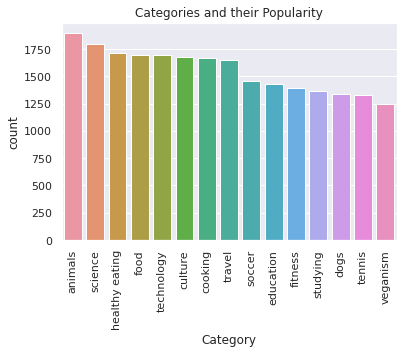

In [39]:
#Using a barchart to visualize the popularity of the Categories
sns.set( rc = {'figure.figsize' : ( 15, 10 ), 
               'axes.labelsize' : 12 })
large_to_small = final_df.groupby('Category').size().sort_values(ascending = False).index[:-1]
sns.countplot(x='Category', data=final_df, order = large_to_small)
plt.title("Categories and their Popularity")
plt.xticks(rotation = 90)

filename = 'Categories_Pop'
plt.savefig(filename+'.png')
plt.show()

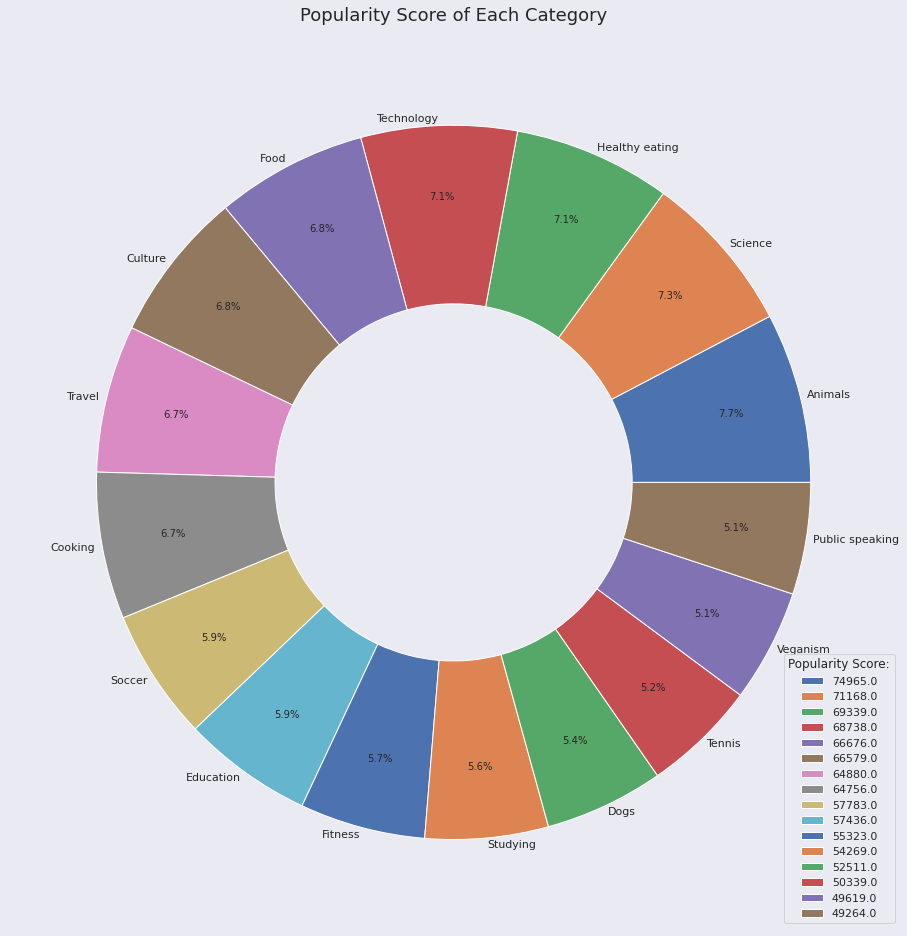

In [40]:
#Get the popularity score of each category
pop_score = final_df.groupby('Category')['Score'].agg('sum').sort_values(ascending = False).reset_index()
#Create a Donut Chart displaying the Score of each category
facecolor = '#eaeaf2'
hfont = {'fontname':'Calibri'}
fig, ax = plt.subplots(figsize=(16,22), facecolor=facecolor)
ax.pie(pop_score.Score, 
       radius=1,
       autopct='%.1f%%',
       pctdistance=0.8,
       labels=pop_score.Category.str.capitalize(),
       labeldistance=1.02,
       wedgeprops=dict(width=0.5, edgecolor='w'))

plt.legend(pop_score.Score, title = "Popularity Score:", loc='lower right')       
ax.set_title('Popularity Score of Each Category', fontsize=18, pad=15)
filename = 'Popularity_Score'
plt.savefig(filename+'.png')
plt.show()
    
    
    
    
    
    

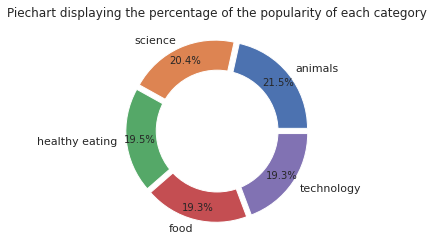

In [41]:
#Plot a donut chart to display the percentage of each category
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
# Pie Chart
plt.pie(top5_categories.Category,  labels=top5_categories.index,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Piechart displaying the percentage of the popularity of each category')

  
# Displaying Chart
plt.show()

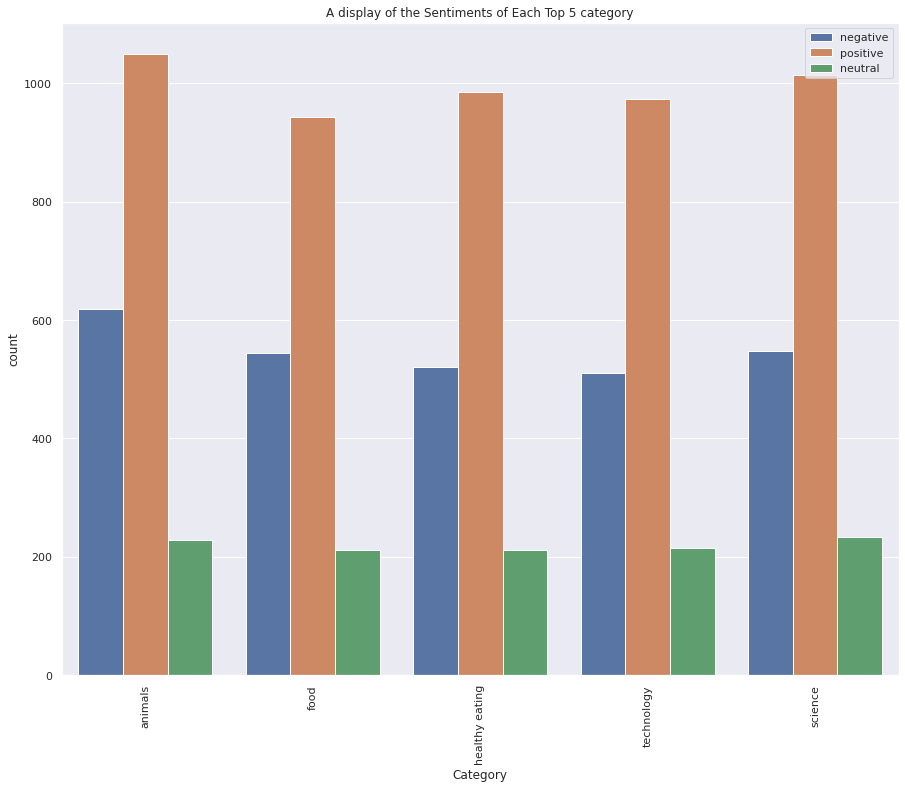

In [42]:
#Countplot displaying Sentiment of Each Top5 Category
#fig, ax = plt.subplots(figsize=(14,6))
sns.set( rc = {'figure.figsize' : ( 15, 12 ), 
               'axes.labelsize' : 12 })
sns.countplot(data=top5_df, x = "Category", hue = "Sentiment")
#fig = g.figure
plt.title("A display of the Sentiments of Each Top 5 category")
plt.xticks(rotation = 90)
plt.legend(loc = "upper right")
filename = 'SentimentScore'
plt.savefig(filename+'.png')
#fig.savefig(filename+'.png')
plt.show()

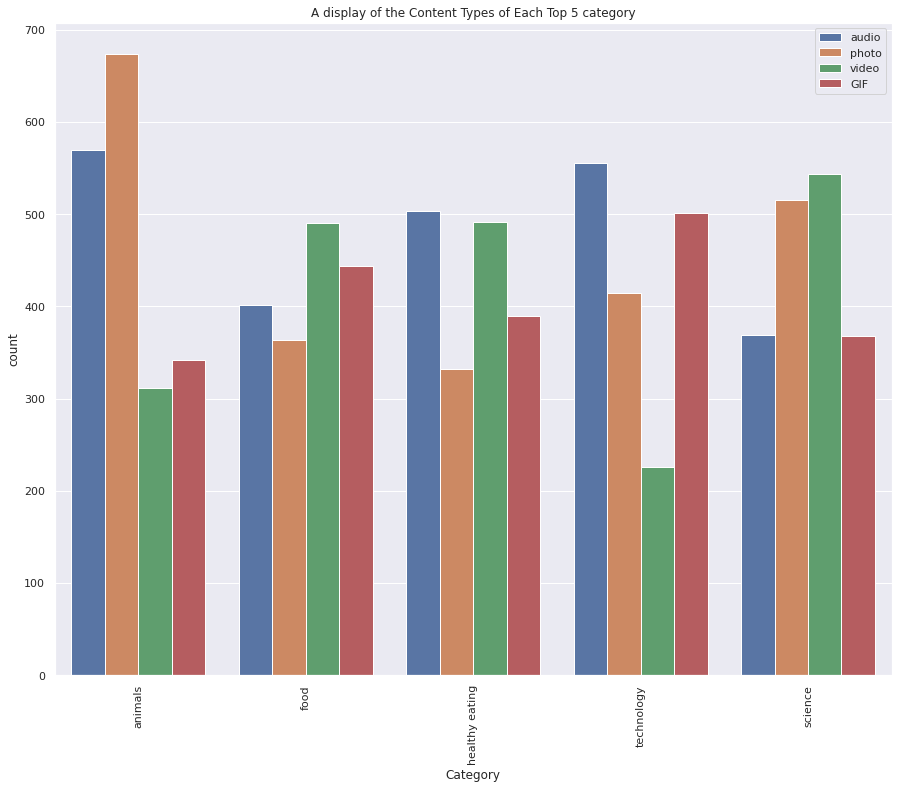

In [43]:
#Countplot displaying ContentType of Each Top5 Category
sns.set( rc = {'figure.figsize' : ( 15, 12 ), 
               'axes.labelsize' : 12 })
sns.countplot(data=top5_df, x = "Category", hue = "Content_Type")

plt.title("A display of the Content Types of Each Top 5 category")
plt.xticks(rotation = 90)
plt.legend(loc = "upper right")
plt.show()

In [44]:
#TreeMap displaying the various reaction types for each Content_Type of each Category
fig = px.treemap(top5_df, path=['Category', 'Content_Type', 'Reaction_Type','Sentiment'])
fig.show()

In [45]:
#Tree Map showing the number of reaction_types for each Content_Type of each Category
new_df = top5_df.groupby(["Category","Content_Type"])["Reaction_Type"].count().reset_index()
new_df = new_df.pivot(index='Category', columns='Content_Type')['Reaction_Type'].fillna(0)
fig = px.imshow(new_df,labels = dict(x='Content_Type', y='Category', color = "Reaction_Type"),x=new_df.columns, y=new_df.index )
fig.update_layout(width=700,height=500)
fig.show()

In [46]:
#Tree Map showing the Sentiment Score for each Content_Type of each Category
new_df = top5_df.groupby(["Category","Content_Type"])["Score"].agg('sum').reset_index()
new_df = new_df.pivot(index='Category', columns='Content_Type')['Score'].fillna(0)
fig = px.imshow(new_df,labels = dict(x='Content_Type', y='Category', color = "Score"),x=new_df.columns, y=new_df.index )
fig.update_layout(width=700,height=500)
fig.show()

In [47]:
# Get the Dataset for 2020
df_2020 = top5_df.query("Datetime.dt.year == 2020")
df_2020


Content_ID Content_Type Category  \
22     674507f9-c555-4876-89c7-c06b6db561c0        audio  animals   
24     674507f9-c555-4876-89c7-c06b6db561c0        audio  animals   
27     674507f9-c555-4876-89c7-c06b6db561c0        audio  animals   
28     674507f9-c555-4876-89c7-c06b6db561c0        audio  animals   
29     674507f9-c555-4876-89c7-c06b6db561c0        audio  animals   
...                                     ...          ...      ...   
25546  4478d98e-43e8-4dc0-884d-c1115aa8b970        audio  animals   
25548  4478d98e-43e8-4dc0-884d-c1115aa8b970        audio  animals   
25549  4478d98e-43e8-4dc0-884d-c1115aa8b970        audio  animals   
25550  4478d98e-43e8-4dc0-884d-c1115aa8b970        audio  animals   
25551  4478d98e-43e8-4dc0-884d-c1115aa8b970        audio  animals   

                                    User_ID Reaction_Type            Datetime  \
22     6e9c7f30-264a-4aa0-b3ac-36e852d10906       disgust 2020-11-25 01:40:43   
24     ef56931b-540b-4166-9090-73ae48ac8d97       disgust 2020-06-26 09:34:23   
27     374634b7-aead-4f2f-9303-c15f456c4094         heart 2020-12-25 00:38:56   
28     317c70d5-fe65-4663-afb1-150108e0e55c       cherish 2020-12-09 04:55:44   
29     92c3576c-8634-42a8-8005-6e1ff8c207e8       disgust 2020-11-03 11:55:12   
...                                     ...           ...                 ...   
25546  b596e7d8-dd3f-4125-8b99-4bf2283657cd    interested 2020-09-21 12:16:29   
25548  9ed68c70-13fd-4346-808f-2665943c46d6          love 2020-09-29 23:50:41   
25549  5b3b843e-7c66-4eac-82b6-8d6f7a19277c       disgust 2020-07-05 20:02:47   
25550  5b3b843e-7c66-4eac-82b6-8d6f7a19277c    super love 2020-06-25 08:02:11   
25551  ce9b41f4-625e-4868-83d1-6b53767a8af5       cherish 2020-11-03 21:53:26   

      Sentiment  Score  
22     negative    0.0  
24     negative    0.0  
27     positive   60.0  
28     positive   70.0  
29     negative    0.0  
...         ...    ...  
25546  positive   30.0  
25548  positive   65.0  
25549  negative    0.0  
25550  positive   75.0  
25551  positive   70.0  

[4742 rows x 8 columns]

In [48]:
#TreeMap displaying the various reaction types for each Content_Type of each Category
fig = px.treemap(df_2020, path=['Content_Type','Score'])
fig.show()

In [49]:
# Get the Dataset for 2021
df_2021 = top5_df.query("Datetime.dt.year == 2021")
#TreeMap displaying the various reaction types for each Content_Type of each Category
fig = px.treemap(df_2021, path=['Content_Type','Score'])
fig.show()

In [50]:
# Get the dataset for each ContentType for the year 2020
audio_2020 = df_2020[df_2020['Content_Type']== 'audio']
GIF_2020 = df_2020[df_2020['Content_Type']== 'GIF']
photo_2020 = df_2020[df_2020['Content_Type']== 'photo']
video_2020 = df_2020[df_2020['Content_Type']== 'video']


In [51]:
count_audio_2020 = audio_2020['Score'].value_counts()
count_GIF_2020 = GIF_2020['Score'].value_counts()
count_photo_2020 = photo_2020['Score'].value_counts()
count_video_2020 = video_2020['Score'].value_counts()

In [52]:
#Filter Dataset with for the year 2020

#convert the top5_categories to a dataframe to be passed as the data object parameter for the pie chart visualization of the top 5 categories
df_audio_2020 = pd.DataFrame(count_audio_2020)
df_GIF_2020 = pd.DataFrame(count_GIF_2020)
df_photo_2020 = pd.DataFrame(count_photo_2020)
df_video_2020 = pd.DataFrame(count_video_2020)


Text(0.5, 1.0, 'Video Content Type Score in 2020')

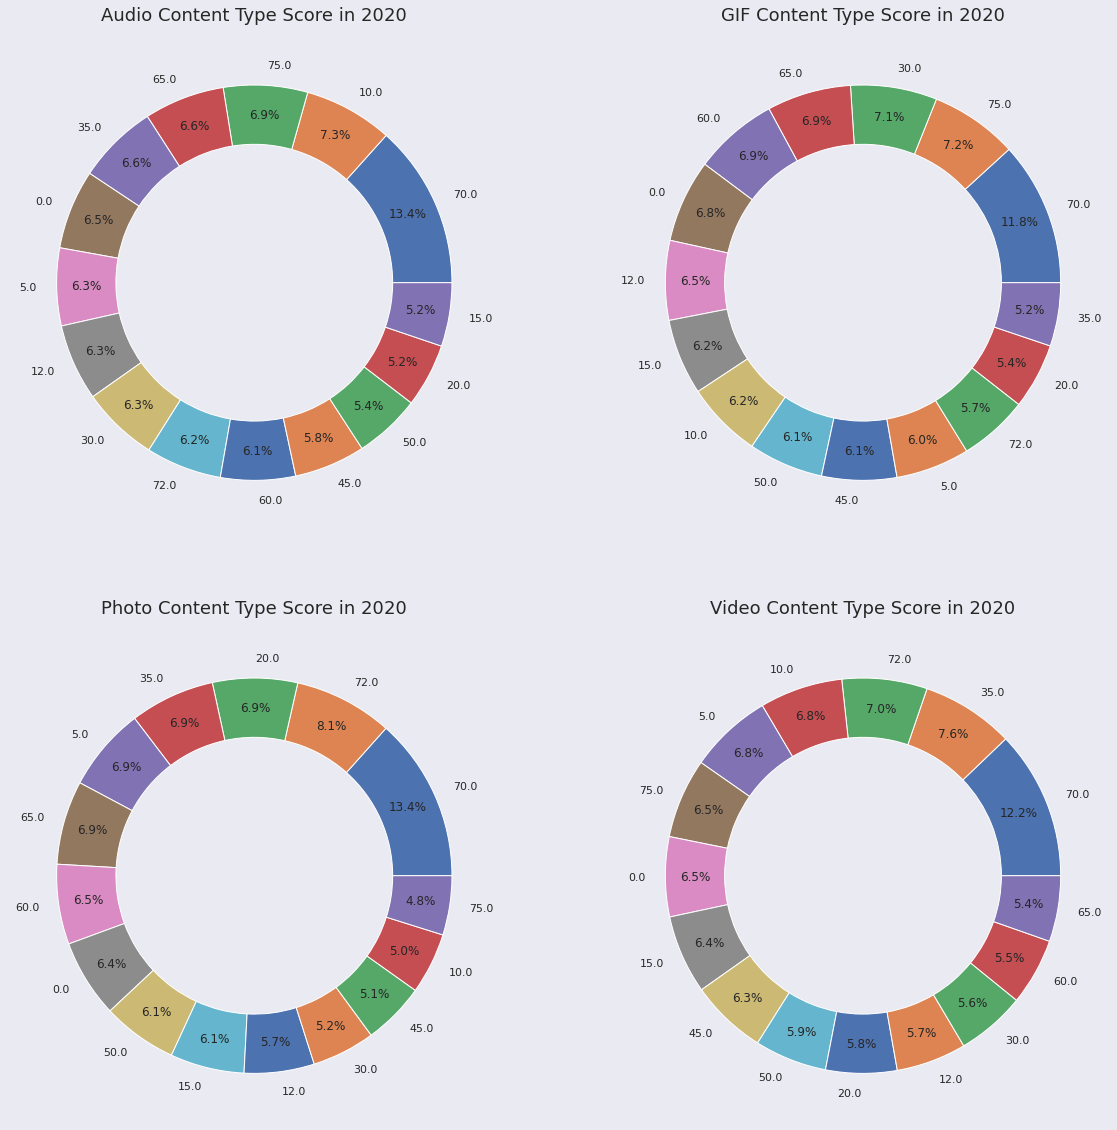

In [53]:
#Plot a donut chart to display the percentage of each category
facecolor = '#eaeaf2'
size = 0.3
#explode = (0.05, 0.05, 0.05, 0.05, 0.05)
fig, ax = plt.subplots(2,2,figsize=(20,20), facecolor = facecolor)
# Pie Chart
ax[0][0].pie(df_audio_2020.Score,  labels=df_audio_2020.index,
        autopct='%1.1f%%', pctdistance=0.85,wedgeprops=dict(width=size, edgecolor='w'))
ax[0][1].pie(df_GIF_2020.Score,  labels=df_GIF_2020.index,
        autopct='%1.1f%%', pctdistance=0.85,wedgeprops=dict(width=size, edgecolor='w'))
ax[1][0].pie(df_photo_2020.Score,  labels=df_photo_2020.index,
        autopct='%1.1f%%', pctdistance=0.85,wedgeprops=dict(width=size, edgecolor='w'))
ax[1][1].pie(df_video_2020.Score,  labels=df_video_2020.index,
        autopct='%1.1f%%', pctdistance=0.85,wedgeprops=dict(width=size, edgecolor='w'))




ax[0][0].set_title('Audio Content Type Score in 2020', fontsize=18, pad=15)
ax[0][1].set_title('GIF Content Type Score in 2020', fontsize=18, pad=15)
ax[1][0].set_title('Photo Content Type Score in 2020', fontsize=18, pad=15)
ax[1][1].set_title('Video Content Type Score in 2020', fontsize=18, pad=15)



#
#filename = 'mpl-nested-pie'
#plt.savefig(filename+'.png', facecolor=facecolor)

In [54]:
# Get the dataset for each ContentType for the year 2021
audio_2021 = df_2021[df_2021['Content_Type']== 'audio']
GIF_2021 = df_2021[df_2021['Content_Type']== 'GIF']
photo_2021 = df_2021[df_2021['Content_Type']== 'photo']
video_2021 = df_2021[df_2021['Content_Type']== 'video']


In [55]:
count_audio_2021 = audio_2021['Score'].value_counts()
count_GIF_2021 = GIF_2021['Score'].value_counts()
count_photo_2021 = photo_2021['Score'].value_counts()
count_video_2021 = video_2021['Score'].value_counts()

In [56]:
#Filter Dataset with for the year 2020

#convert the top5_categories to a dataframe to be passed as the data object parameter for the pie chart visualization of the top 5 categories
df_audio_2021 = pd.DataFrame(count_audio_2021)
df_GIF_2021 = pd.DataFrame(count_GIF_2021)
df_photo_2021 = pd.DataFrame(count_photo_2021)
df_video_2021 = pd.DataFrame(count_video_2021)


Text(0.5, 1.0, 'Video Content Type Score in 2021')

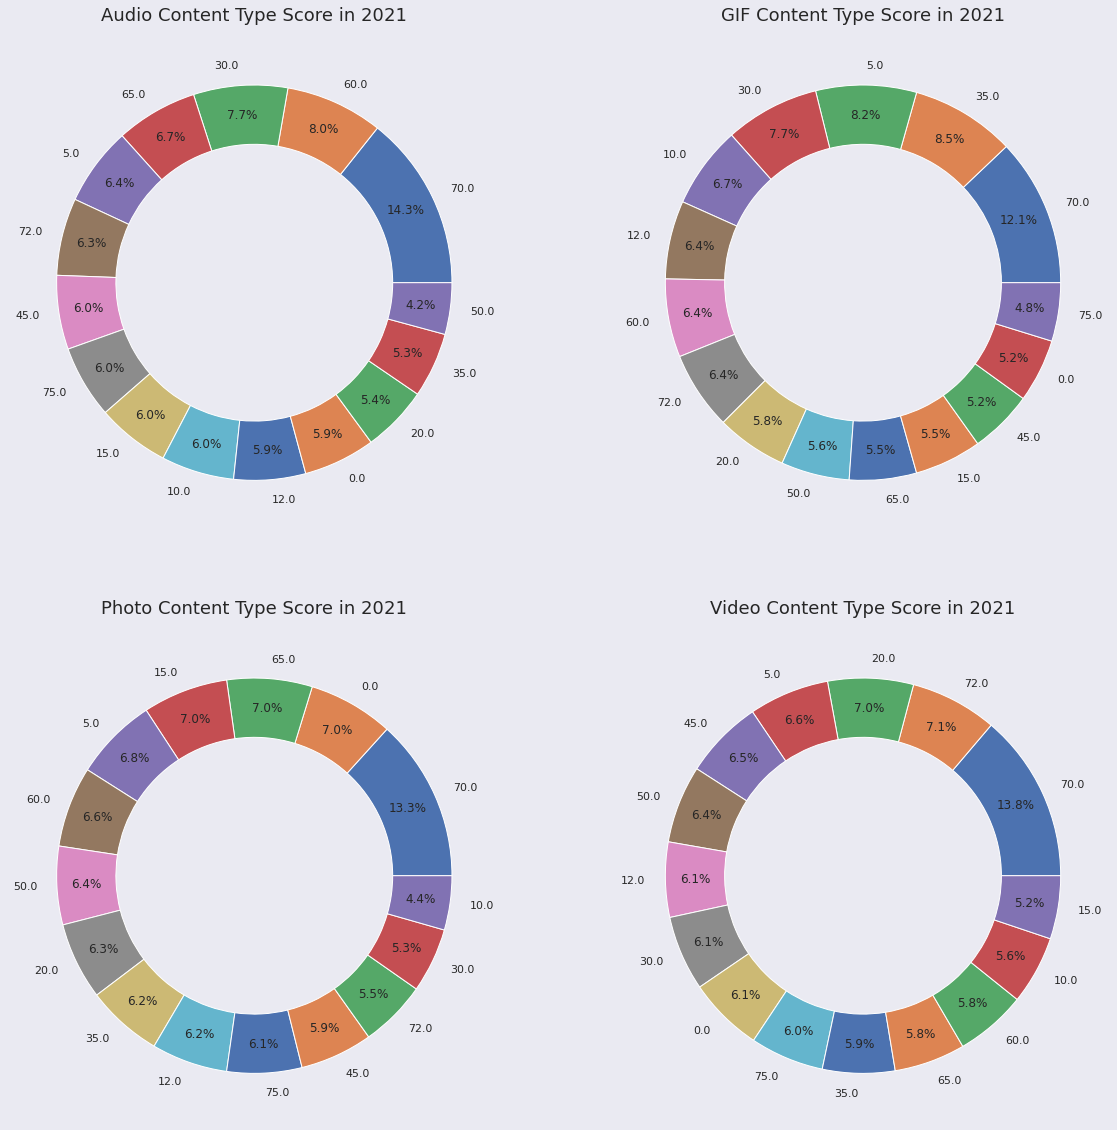

In [57]:
#Plot a donut chart to display the percentage of each category
facecolor = '#eaeaf2'
size = 0.3
#explode = (0.05, 0.05, 0.05, 0.05, 0.05)
fig, ax = plt.subplots(2,2,figsize=(20,20), facecolor = facecolor)
# Pie Chart
ax[0][0].pie(df_audio_2021.Score,  labels=df_audio_2021.index,
        autopct='%1.1f%%', pctdistance=0.85,wedgeprops=dict(width=size, edgecolor='w'))
ax[0][1].pie(df_GIF_2021.Score,  labels=df_GIF_2021.index,
        autopct='%1.1f%%', pctdistance=0.85,wedgeprops=dict(width=size, edgecolor='w'))
ax[1][0].pie(df_photo_2021.Score,  labels=df_photo_2021.index,
        autopct='%1.1f%%', pctdistance=0.85,wedgeprops=dict(width=size, edgecolor='w'))
ax[1][1].pie(df_video_2021.Score,  labels=df_video_2021.index,
        autopct='%1.1f%%', pctdistance=0.85,wedgeprops=dict(width=size, edgecolor='w'))

ax[0][0].set_title('Audio Content Type Score in 2021', fontsize=18, pad=15)
ax[0][1].set_title('GIF Content Type Score in 2021', fontsize=18, pad=15)
ax[1][0].set_title('Photo Content Type Score in 2021', fontsize=18, pad=15)
ax[1][1].set_title('Video Content Type Score in 2021', fontsize=18, pad=15)


In [58]:
#Find top 5 users that gave the highest positive review of 75
a = top5_df.groupby(['User_ID','Score']).size().reset_index()
b = pd.pivot_table(a, index=['User_ID'], columns=['Score'])
d = b[(0,75)]
e = pd.DataFrame(d)
print(e.nlargest(5,(0,75)))

                                        0
                                     75.0
User_ID                                  
0f1f6aef-b094-4b4d-b6b6-412ebc42c12b  5.0
31cfc138-cec0-4176-bd6d-79c4cadbb1d4  5.0
052faed2-37ac-4a2c-ba6f-2657322e4fa5  4.0
311d7214-711f-4f66-bc9a-e835fa54ffb6  4.0
55380131-13c6-4a5c-8826-ead0ea8895cc  4.0


In [59]:
top5_df['year_month'] = top5_df['Datetime'].dt.to_period('M')
top5_df['year_month']=top5_df['year_month'].astype(str)
top5_df.info()
v = top5_df.groupby('year_month')['User_ID'].aggregate('count').reset_index()
fig = px.line(v, x="year_month", y="User_ID", hover_name="User_ID",
        line_shape="spline", render_mode="svg")
fig.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 21 to 25552
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content_ID     8807 non-null   object        
 1   Content_Type   8807 non-null   object        
 2   Category       8807 non-null   object        
 3   User_ID        8807 non-null   object        
 4   Reaction_Type  8807 non-null   object        
 5   Datetime       8807 non-null   datetime64[ns]
 6   Sentiment      8807 non-null   object        
 7   Score          8807 non-null   float64       
 8   year_month     8807 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 946.1+ KB


/tmp/ipykernel_4967/1992434267.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4967/1992434267.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:

v = top5_df.groupby(['year_month','Category'])['User_ID'].aggregate('count').reset_index()
v

year_month        Category  User_ID
0     2020-06         animals       79
1     2020-06            food       52
2     2020-06  healthy eating       69
3     2020-06         science       64
4     2020-06      technology       60
..        ...             ...      ...
60    2021-06         animals       94
61    2021-06            food       72
62    2021-06  healthy eating       77
63    2021-06         science       85
64    2021-06      technology       82

[65 rows x 3 columns]

In [61]:
x = v['year_month'].value_counts().reset_index()
x['index']

0     2020-06
1     2020-07
2     2020-08
3     2020-09
4     2020-10
5     2020-11
6     2020-12
7     2021-01
8     2021-02
9     2021-03
10    2021-04
11    2021-05
12    2021-06
Name: index, dtype: object

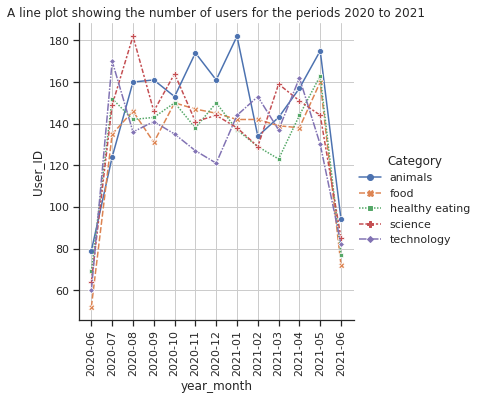

In [67]:
x = v['year_month'].value_counts().reset_index()
x['index']
# Set figure size
sns.set( rc = {'figure.figsize' : ( 20, 50 ), 
               'axes.labelsize' : 12 })
sns.set(style="ticks")
g = sns.relplot(x = "year_month", y = 'User_ID',data = v,
           style = "Category", hue = "Category",kind = "line",
           markers = True)
g.set_xticklabels(x['index'], rotation = 90) 
plt.title("A line plot showing the number of users for the periods 2020 to 2021")
plt.grid()
plt.show()
#Save chart
filename = 'Content_Type'
g.savefig(filename+'.png')
